In [1]:
import hdf5storage
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from analysis_util import *
import string
import seaborn as sns
'''this script concate each block per subject to a file wihthin subject called s103_df_concat.csv'''

'''subsequently save a concatenante file under rechain-beh called all_df_concat.csv '''
# global setting f
plt.rcParams.update({"font.size": 18})
colors = sns.color_palette()
sns.set(style="whitegrid")
# top level dir 
# 

PROJECT_DIR = "/data/rwchain-all/round2"
BEH_DIR = os.path.join(PROJECT_DIR, "rwchain-beh/data")
EEG_DIR = os.path.join(PROJECT_DIR, "rwchain-eeg")
ALL_BEH_DIR = os.path.join(PROJECT_DIR, 'rwchain-beh', 'combined')


In [2]:
CODE_DIR = "/home/jenny/evidence-chain/"
FIG_DIR = os.path.join(CODE_DIR, "figs/descriptive/")

In [3]:
list_of_subj = os.listdir(BEH_DIR)
list_of_subj.sort()
# list_of_subj = [list_of_subj[5]]

df = pd.read_pickle(os.path.join(ALL_BEH_DIR, 'all_df_concat.pkl'))
# organize some columsn
 
df['key'][df['key'] == '[5]'] = 1
df['key'][df['key'] == '[3]'] = 1
df['key'][df['key'] == '[2]'] = 0
df['cumsum'] = df['sequence_clean'].apply(lambda x: [sum(x[:i+1]) for i in range(len(x))])




# df = df[df['stimDur'] == 0.1]
# df = df[df['stimDur'] != 0.05]


/tmp/ipykernel_1538791/2841921876.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['key'][df['key'] == '[5]'] = 1
/tmp/ipykernel_1538791/2841921876.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['key'][df['key'] == '[3]'] = 1
/tmp/ipykernel_1538791/2841921876.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['key'][df['key'] == '[2]'] = 0


In [4]:
# correct the count
df = correct_samples_by_condition(df)

cumsum = np.array(df['cumsum'].to_list())
sequence =  np.array(df['sequence_clean'].to_list())
count = df['count_corrected'].to_numpy()

In [5]:
df.shape

(9200, 13)

In [6]:

# create a matrix of +1 and -1 with NaNs if the chain terminates

chain_matrix = get_chain_matrix(sequence, count)



In [7]:
df

,time,bytetime,press,count,key,stimDur,Bias,sequence,block,sequence_clean,sid,cumsum,count_corrected
0,2.6166679859161377,2611,[1],10,0,0.25,0.12,[-1. 1. -1. 1. -1. 1. -1. -1. -1. -1. -1. ...,0,"[-1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, ...",s102,"[-1.0, 0.0, -1.0, 0.0, -1.0, 0.0, -1.0, -2.0, ...",9
1,2.2499890327453613,2233,[1],8,1,0.25,0.12,[-1. -1. -1. 1. 1. 1. 1. 1. -1. -1. -1. -...,0,"[-1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1...",s102,"[-1.0, -2.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, ...",7
2,2.1333320140838623,2118,[1],8,0,0.25,0.12,[ 1. -1. -1. -1. 1. 1. -1. -1. -1. -1. 1. ...,0,"[1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, ...",s102,"[1.0, 0.0, -1.0, -2.0, -1.0, 0.0, -1.0, -2.0, ...",7
3,1.2833738327026367,1270,[1],5,1,0.25,0.12,[ 1. 1. 1. 1. -1. 1. 1. -1. -1. -1. 1. -...,0,"[1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1....",s102,"[1.0, 2.0, 3.0, 4.0, 3.0, 4.0, 5.0, 4.0, 3.0, ...",4
4,2.3333139419555664,2318,[1],9,1,0.25,0.12,[-1. 1. -1. 1. 1. -1. 1. 1. 1. -1. -1. -...,0,"[-1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1....",s102,"[-1.0, 0.0, -1.0, 0.0, 1.0, 0.0, 1.0, 2.0, 3.0...",8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2.3166489601135254,2308,[1],23,0,0.10,0.12,[-1. 1. 1. -1. -1. -1. -1. 1. 1. -1. -1. -...,9,"[-1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, ...",s113,"[-1.0, 0.0, 1.0, 0.0, -1.0, -2.0, -3.0, -2.0, ...",21
996,2.599961996078491,2590,[1],25,0,0.10,0.12,[ 1. 1. -1. 1. -1. -1. -1. 1. -1. -1. -1. ...,9,"[1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -...",s113,"[1.0, 2.0, 1.0, 2.0, 1.0, 0.0, -1.0, 0.0, -1.0...",23
997,2.2333149909973145,2225,[1],22,0,0.10,0.12,[ 1. 1. -1. 1. -1. -1. -1. -1. 1. 1. -1. -...,9,"[1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, ...",s113,"[1.0, 2.0, 1.0, 2.0, 1.0, 0.0, -1.0, -2.0, -1....",20
998,2.3499770164489746,2342,[1],23,0,0.10,0.12,[-1. 1. -1. -1. -1. -1. -1. 1. -1. 1. 1. -...,9,"[-1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0,...",s113,"[-1.0, 0.0, -1.0, -2.0, -3.0, -4.0, -5.0, -4.0...",21


In [8]:

# calculate terminated chains
cumsum_stop_list = []

for c in range(cumsum.shape[0]):
    cumsum_stop = cumsum[
        c, : int(count[c]+1)
    ]  # for example, if rt adjusted i 708, for 250ms, one have seen 3 stimulus.
    cumsum_stop_list.append(cumsum_stop)
 



In [9]:
level_at_response = [i[-1] for i in cumsum_stop_list]
resp = df['key'].tolist()

acc = []
bound = []
for num, k in zip(level_at_response, resp):
    if (num <= 0 and k == 0) or (num >= 0 and k == 1):
        acc.append(1)
    else:
        acc.append(0)
    bound.append(np.abs(num))
print(sum(acc))
df['acc'] = acc
df['bound'] = bound

7916


In [10]:
df

,time,bytetime,press,count,key,stimDur,Bias,sequence,block,sequence_clean,sid,cumsum,count_corrected,acc,bound
0,2.6166679859161377,2611,[1],10,0,0.25,0.12,[-1. 1. -1. 1. -1. 1. -1. -1. -1. -1. -1. ...,0,"[-1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, ...",s102,"[-1.0, 0.0, -1.0, 0.0, -1.0, 0.0, -1.0, -2.0, ...",9,1,4.0
1,2.2499890327453613,2233,[1],8,1,0.25,0.12,[-1. -1. -1. 1. 1. 1. 1. 1. -1. -1. -1. -...,0,"[-1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1...",s102,"[-1.0, -2.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, ...",7,1,2.0
2,2.1333320140838623,2118,[1],8,0,0.25,0.12,[ 1. -1. -1. -1. 1. 1. -1. -1. -1. -1. 1. ...,0,"[1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, ...",s102,"[1.0, 0.0, -1.0, -2.0, -1.0, 0.0, -1.0, -2.0, ...",7,1,2.0
3,1.2833738327026367,1270,[1],5,1,0.25,0.12,[ 1. 1. 1. 1. -1. 1. 1. -1. -1. -1. 1. -...,0,"[1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1....",s102,"[1.0, 2.0, 3.0, 4.0, 3.0, 4.0, 5.0, 4.0, 3.0, ...",4,1,3.0
4,2.3333139419555664,2318,[1],9,1,0.25,0.12,[-1. 1. -1. 1. 1. -1. 1. 1. 1. -1. -1. -...,0,"[-1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1....",s102,"[-1.0, 0.0, -1.0, 0.0, 1.0, 0.0, 1.0, 2.0, 3.0...",8,1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2.3166489601135254,2308,[1],23,0,0.10,0.12,[-1. 1. 1. -1. -1. -1. -1. 1. 1. -1. -1. -...,9,"[-1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, ...",s113,"[-1.0, 0.0, 1.0, 0.0, -1.0, -2.0, -3.0, -2.0, ...",21,1,6.0
996,2.599961996078491,2590,[1],25,0,0.10,0.12,[ 1. 1. -1. 1. -1. -1. -1. 1. -1. -1. -1. ...,9,"[1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -...",s113,"[1.0, 2.0, 1.0, 2.0, 1.0, 0.0, -1.0, 0.0, -1.0...",23,1,2.0
997,2.2333149909973145,2225,[1],22,0,0.10,0.12,[ 1. 1. -1. 1. -1. -1. -1. -1. 1. 1. -1. -...,9,"[1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, ...",s113,"[1.0, 2.0, 1.0, 2.0, 1.0, 0.0, -1.0, -2.0, -1....",20,1,7.0
998,2.3499770164489746,2342,[1],23,0,0.10,0.12,[-1. 1. -1. -1. -1. -1. -1. 1. -1. 1. 1. -...,9,"[-1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0,...",s113,"[-1.0, 0.0, -1.0, -2.0, -3.0, -4.0, -5.0, -4.0...",21,1,6.0


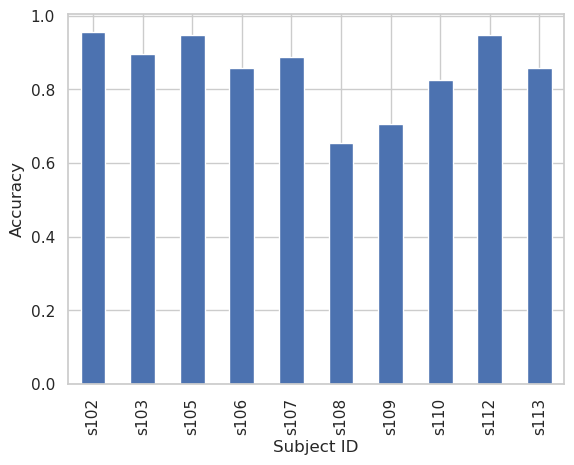

In [11]:
fig, ax = plt.subplots()
result = df.groupby('sid')['acc'].mean()
result.plot.bar(y = 'Accuracy', ax=ax)
ax.set_xlabel("Subject ID")
ax.set_ylabel("Accuracy")
fig.savefig(f'{FIG_DIR}accuracy_by_subject.png', dpi=300)

In [12]:
df['signed_bound'] = df['bound']
df.loc[df['acc']==0, "signed_bound"] = -1 * df.loc[df['acc']==0, "bound"]

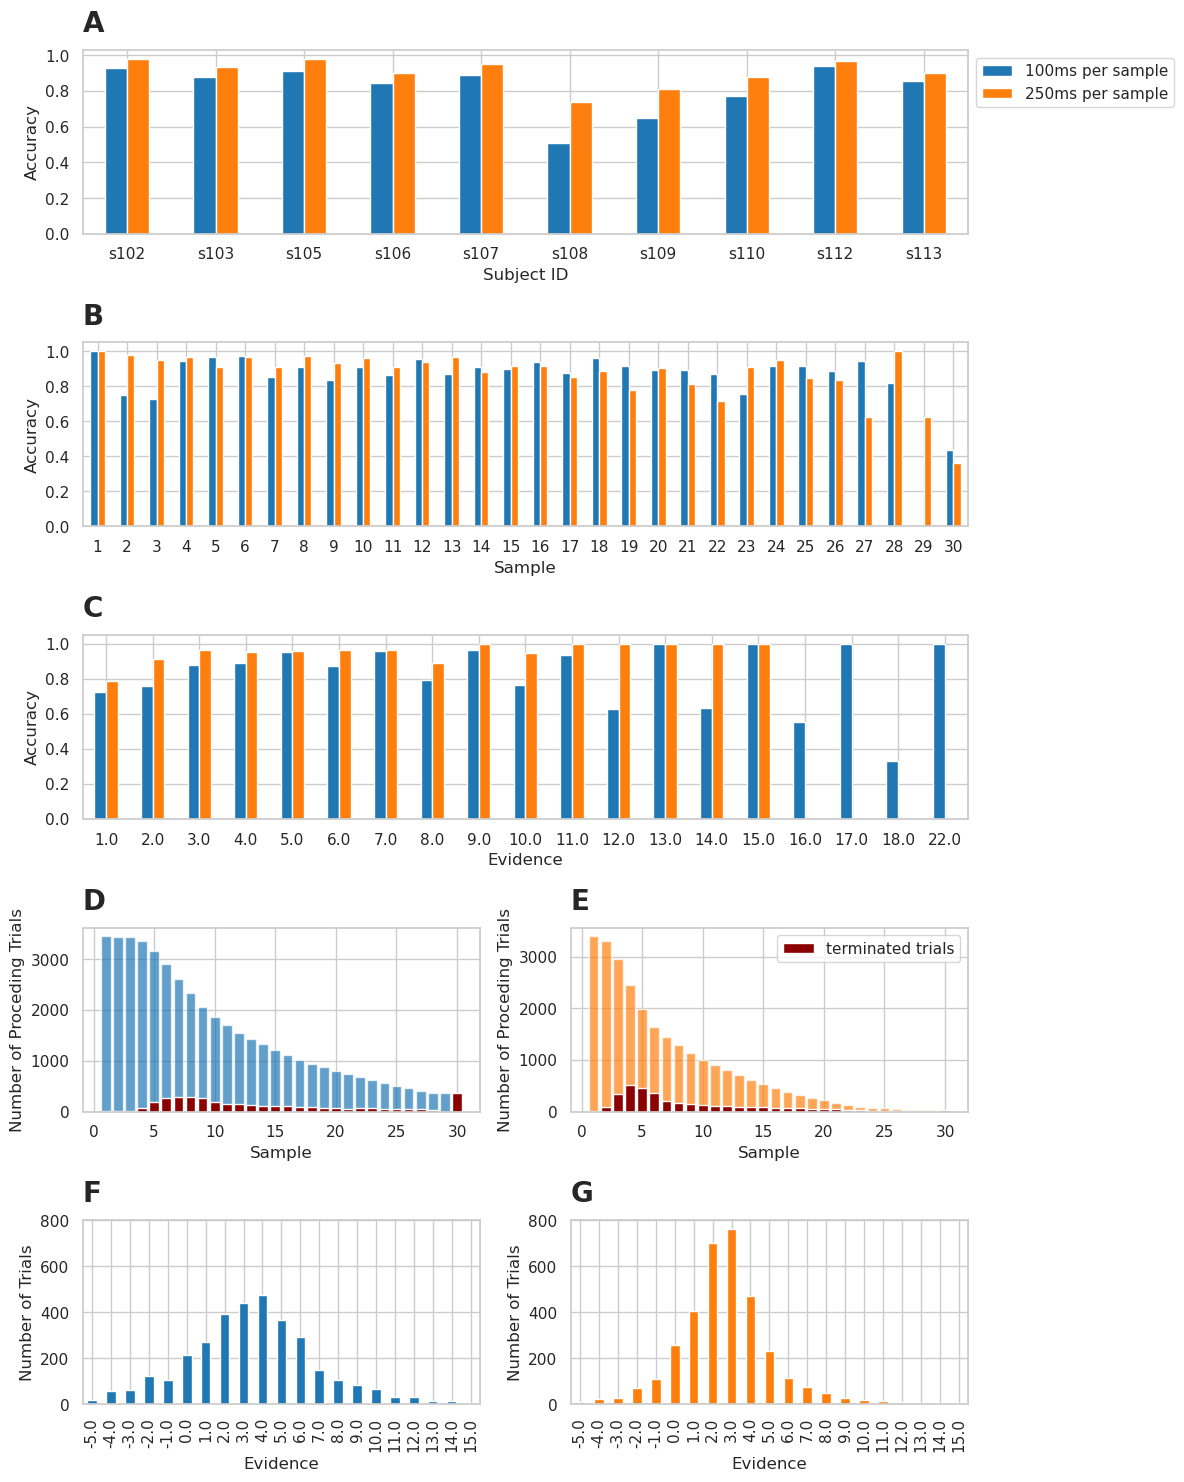

In [13]:
# creating grid for subplots
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(12)
 
ax1 = plt.subplot2grid(shape=(5, 2), loc=(0, 0), colspan=2)
ax2 = plt.subplot2grid(shape=(5, 2), loc=(1, 0), colspan=2)
ax3 = plt.subplot2grid(shape=(5, 2), loc=(2, 0), colspan=2)
# ax4 = plt.subplot2grid(shape=(5, 2), loc=(3, 0), colspan=1)
# ax5 = plt.subplot2grid(shape=(5, 2), loc=(3, 1), colspan=1)
ax6 = plt.subplot2grid(shape=(5, 2), loc=(3, 0), colspan=1)
ax7 = plt.subplot2grid(shape=(5, 2), loc=(3, 1), colspan=1)
ax8 = plt.subplot2grid(shape=(5, 2), loc=(4, 0), colspan=1)
ax9 = plt.subplot2grid(shape=(5, 2), loc=(4, 1), colspan=1)


axs = [ax1,ax2,ax3, ax6, ax7,ax8,ax9]

# accuracy by subject

result0 = df[df['stimDur']==0.1].groupby('sid')['acc'].mean()
result1 = df[df['stimDur']==0.25].groupby('sid')['acc'].mean()
df_acc = pd.DataFrame({"100ms": result0, "250ms": result1})
df_acc.plot.bar(rot=0, ax=ax1, color = colors)
ax1.set_xlabel("Subject ID")
ax1.set_ylabel("Accuracy")

# get rid of low acc subject
df = df[df['sid']!='s108']


# accuracy by sample position
result0 = df[df['stimDur']==0.1].groupby('count_corrected')['acc'].mean()
result1 = df[df['stimDur']==0.25].groupby('count_corrected')['acc'].mean()

df_acc_pos = pd.DataFrame({"100ms": result0, "250ms": result1})
df_acc_pos.plot.bar(rot=0, ax=ax2, color = colors)

ax2.set_xticklabels((np.arange(1,31)))
ax2.set_xlabel("Sample")
ax2.set_ylabel("Accuracy")

# accuracy by bound
# accuracy by sample position
result0 = df[df['stimDur']==0.1].groupby('bound')['acc'].mean()
result1 = df[df['stimDur']==0.25].groupby('bound')['acc'].mean()

df_acc_bound = pd.DataFrame({"100ms": result0[1:], "250ms": result1[1:]})
df_acc_bound.plot.bar(rot=0, ax=ax3, color = colors)

ax3.set_xlabel("Evidence")
ax3.set_ylabel("Accuracy")

# distirubiton
value_counts_100 =df[df["stimDur"]==0.1]['count_corrected'].value_counts().sort_index()
full_index = range(0,30)
complete_counts_100 = value_counts_100.reindex(full_index,fill_value=0)

value_counts_250 =df[df["stimDur"]==0.25]['count_corrected'].value_counts().sort_index()
complete_counts_250 = value_counts_250.reindex(full_index,fill_value=0)



# ax4.bar(np.arange(1,31), complete_counts_100, color = colors[0])
# ax5.bar(np.arange(1,31),complete_counts_250, color = colors[1])


# total trials 
counts_100 = {}
# Count for count_corrected == 0
for i in range(30):
    counts_100[f'>{i}'] = (df[df["stimDur"]==0.1]['count_corrected'] > i).sum()
counts_df_100 = pd.DataFrame(list(counts_100.items()), columns=['Condition', 'Count'])


counts_200 = {}
# Count for count_corrected == 0
for i in range(30):
    counts_200[f'>{i}'] = (df[df["stimDur"]==0.25]['count_corrected'] > i).sum()
counts_df_200 = pd.DataFrame(list(counts_200.items()), columns=['Condition', 'Count'])


ax6.bar(np.arange(1,31), counts_df_100['Count'], color = colors[0], alpha = 0.7)
ax7.bar(np.arange(1,31), counts_df_200['Count'], color = colors[1], alpha = 0.7)
ax6.bar(np.arange(1,31), complete_counts_100, color = "darkred")
ax7.bar(np.arange(1,31),complete_counts_250, color = "darkred",label = "terminated trials")


ax6.set_xlabel("Sample")
ax6.set_ylabel("Number of Proceding Trials")


ax7.set_xlabel("Sample")
ax7.set_ylabel("Number of Proceding Trials")




evidence_counts_100 =df[df["stimDur"]==0.1]['signed_bound'].value_counts().sort_index()
evidence_counts_250 =df[df["stimDur"]==0.25]['signed_bound'].value_counts().sort_index()


filtered_100 = evidence_counts_100[(evidence_counts_100.index >= -5) & (evidence_counts_100.index <= 15)]
filtered_250 = evidence_counts_250[(evidence_counts_250.index >= -5) & (evidence_counts_250.index <= 15)]
filtered_100.plot.bar(color=colors[0], ax=ax8)
filtered_250.plot.bar(color=colors[1], ax=ax9)




label_list = []
for t in ax1.get_legend_handles_labels():
    # the first result will be all handles, i.e. the dots in the legend
    # the second result will be all legend text
    label_list.append(t)

new_list = []
for txt in label_list[1]:
    if txt[0] == '0':
        txt = str(txt)[:4]
    new_list.append(txt)
label_list[1] = new_list


label_list = ['100ms per sample', '250ms per sample']
ax1.legend(bbox_to_anchor = (1,1,0,0), labels=label_list)
ax7.legend(bbox_to_anchor = (1,1,0,0))


_lg = ax2.get_legend()
_lg.remove()

_lg = ax3.get_legend()
_lg.remove()



for n, ax in enumerate(axs):
    ax.text(0, 1.1, string.ascii_uppercase[n], transform=ax.transAxes, 
            size=20, weight='bold')

for ax in [ax8,ax9]:
    ax.set_ylim(0,800)
    ax.set_xlabel("Evidence")
    ax.set_ylabel("Number of Trials")    

fig.tight_layout()

fig.savefig(f'{FIG_DIR}accuracy_subplots.png', dpi=300)

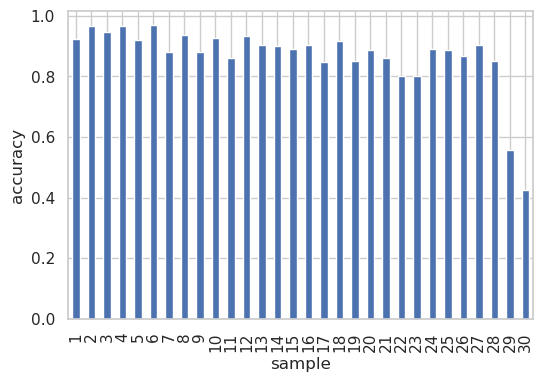

In [14]:
fig, ax = plt.subplots(figsize = (6,4))

df.groupby('count_corrected')['acc'].mean().plot.bar(ax=ax)
ax.set_xticklabels((np.arange(1,31)))
ax.set_xlabel("sample")
ax.set_ylabel("accuracy")
fig.savefig(f'{FIG_DIR}accuracy_by_sample.png', dpi=300)

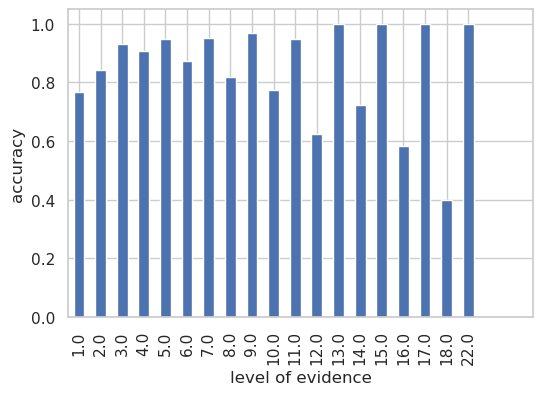

In [15]:
fig, ax = plt.subplots(figsize = (6,4))

df.groupby('bound')['acc'].mean().plot.bar(ax=ax)
ax.set_xlim(0.5,22)
ax.set_xlabel("level of evidence")
ax.set_ylabel("accuracy")
fig.savefig(f'{FIG_DIR}accuracy_by_bound.png', dpi=300)

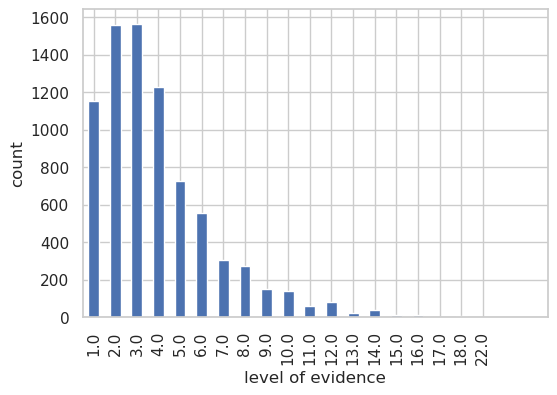

In [16]:
fig, ax = plt.subplots(figsize = (6,4))

df.groupby('bound')['acc'].count().plot.bar(ax=ax)
ax.set_xlim(0.5,22)
ax.set_xlabel("level of evidence")
ax.set_ylabel("count")
fig.savefig(f'{FIG_DIR}accuracy_by_bound.png', dpi=300)

In [17]:
sum(df['bound']==6)

554

In [18]:
df1 = df.loc[df['bound']==6]

<Axes: xlabel='count_corrected'>

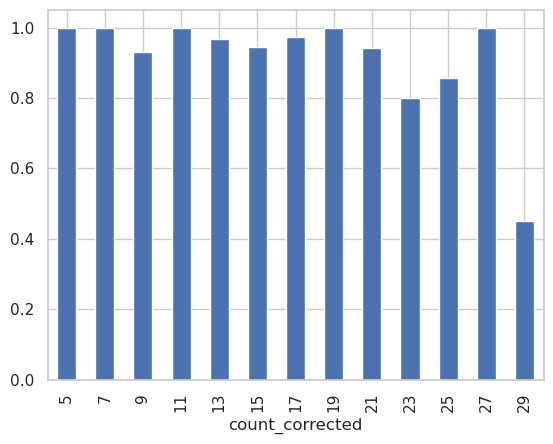

In [19]:
fig, ax = plt.subplots()
df1.groupby('count_corrected')['acc'].mean().plot.bar(ax=ax)

Text(0, 0.5, 'Number of Trials')

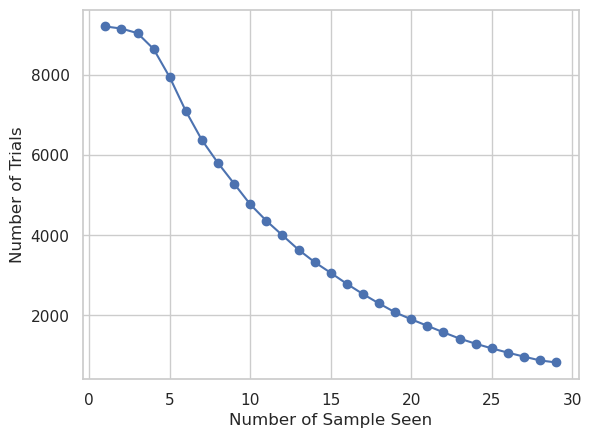

In [20]:
nTrials = []
for stop_sample in range(0, 29):
    dataset, dataset_resp = make_dataset(stop_sample, count, chain_matrix)

    nTrials.append(dataset.shape[0])
plt.plot(np.arange(1, 30), np.array(nTrials), "o-")
plt.xlabel("Number of Sample Seen")
plt.ylabel("Number of Trials")



In [21]:

# df = df[df['stimDur'] == 0.1]
# df = df[df['stimDur'] != 0.05]

In [22]:
# my_labels =['trials that proceeded at this position', 'trials that termianted at this position']
# unique_stimDur = df['stimDur'].unique()
# unique_stimDur.sort()
# fig,ax = plt.subplots(2,2, figsize = (12,8))
# ax = ax.flatten()
# for ind, stimdur in enumerate(unique_stimDur):
#     stim_ind = df['stimDur']==stimdur
#     for stop_sample in range(0, 29):
#         dataset, dataset_resp = make_dataset(stop_sample, count[stim_ind], chain_matrix[stim_ind,:])
#         ax[ind].bar(stop_sample+1, len(dataset), color='blue', label=my_labels[0])
#         ax[ind].bar(stop_sample+1, dataset_resp.sum(),color='red', label=my_labels[1])
#         my_labels = ['__nolabels__']*2
#         # size of the samples                                                        
#         # percentage of termination
#         ax[ind].set_xlabel("Number of Samples Seen")
#         ax[ind].set_ylabel("Number of Trials")
#         ax[ind].set_ylabel("Number of Trials")
#         ax[ind].set_title(f"Sample Duration {stimdur}")

# ax[1].legend()
# fig.tight_layout()
# fig.show()
# fig.savefig(f'{FIG_DIR}termination_proportion_all.png', dpi=300, bbox_inches='tight')

9200
0.005760869565217391
9147
0.012463102656608724
9033
0.04372855086903576
8638
0.08138457976383422
7935
0.10623818525519849
7092
0.10194585448392555
6369
0.08981001727115717
5797
0.08866655166465413
5283
0.09748249100889646
4768
0.08578020134228188
4359
0.08304657031429227
3997
0.09006755066299725
3637
0.08496013197690404
3328
0.08022836538461539
3061
0.08951323097027115
2787
0.09113742375313957
2533
0.0927753651796289
2298
0.09617058311575283
2077
0.08377467501203659
1903
0.08460325801366264
1742
0.09357060849598163
1579
0.09816339455351489
1424
0.09058988764044944
1295
0.0888030888030888
1180
0.09067796610169492
1073
0.09226467847157502
974
0.09753593429158111
879
0.05688282138794084
829
0.019300361881785282


/tmp/ipykernel_1538791/242936448.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


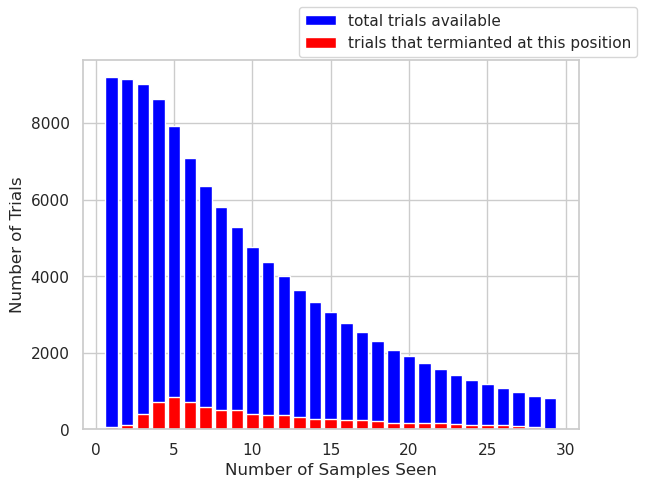

In [23]:
my_labels =['total trials available', 'trials that termianted at this position']

fig,ax = plt.subplots()
for stop_sample in range(0, 29):
    dataset, dataset_resp = make_dataset(stop_sample, count, chain_matrix)
    ax.bar(stop_sample+1, len(dataset), color='blue', label=my_labels[0])
    ax.bar(stop_sample+1, dataset_resp.sum(),color='red', label=my_labels[1])
    my_labels = ['__nolabels__']*2
    # size of the samples 
    print(len(dataset))                                                         
    # percentage of termination
    print(dataset_resp.sum() / len(dataset))

ax.set_xlabel("Number of Samples Seen")
ax.set_ylabel("Number of Trials")
fig.legend()
fig.show()
fig.savefig(f'{FIG_DIR}termination_rate_combined.png', dpi=300, bbox_inches='tight')

In [24]:
df.shape

(8450, 16)

In [25]:
chain_matrix = get_chain_matrix(sequence, count)


In [26]:
dataset, dataset_resp = make_dataset(12, count, chain_matrix)


In [27]:
bound = get_abs_evidence(dataset)[:,-1]

/tmp/ipykernel_1538791/60570793.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


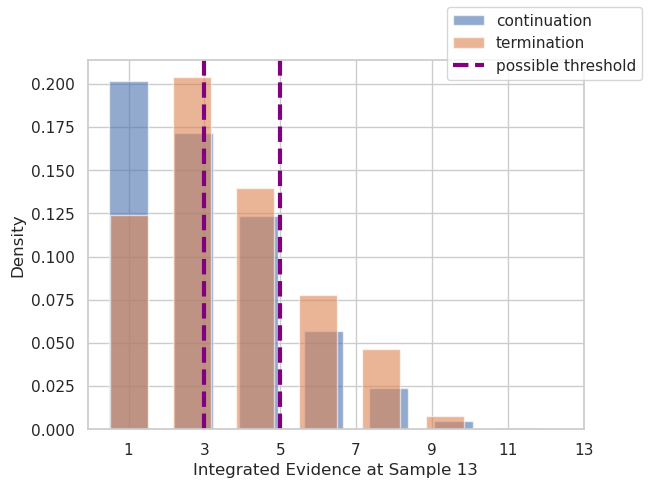

In [28]:

x = bound[dataset_resp]

fig, ax = plt.subplots()



ax.hist(bound[~dataset_resp], alpha=0.6, density=True,bins=7, label = 'continuation',align='left',rwidth=0.6)
ax.hist(bound[dataset_resp],alpha=0.6, density=True, bins=6,  label = 'termination', align='left',rwidth=0.6)

ax.set_xlabel("Integrated Evidence at Sample 13")
ax.set_ylabel("Density")
ax.set_xticks(np.arange(1,14,2))

ax.axvline(x=3, linewidth = 3, label = 'possible threshold', color= 'purple',linestyle = '--')
ax.axvline(x=5, linewidth = 3, color= 'purple',linestyle = '--')


fig.legend()
fig.show()
fig.savefig(f'{FIG_DIR}signal_detection_example.png', dpi=300)



In [29]:
np.unique(bound[dataset_resp], return_counts=True)

(array([ 1.,  3.,  5.,  7.,  9., 11.]), array([ 64, 105,  72,  40,  24,   4]))

In [30]:
# subject level plots

In [31]:
ids = df["sid"].unique().tolist()

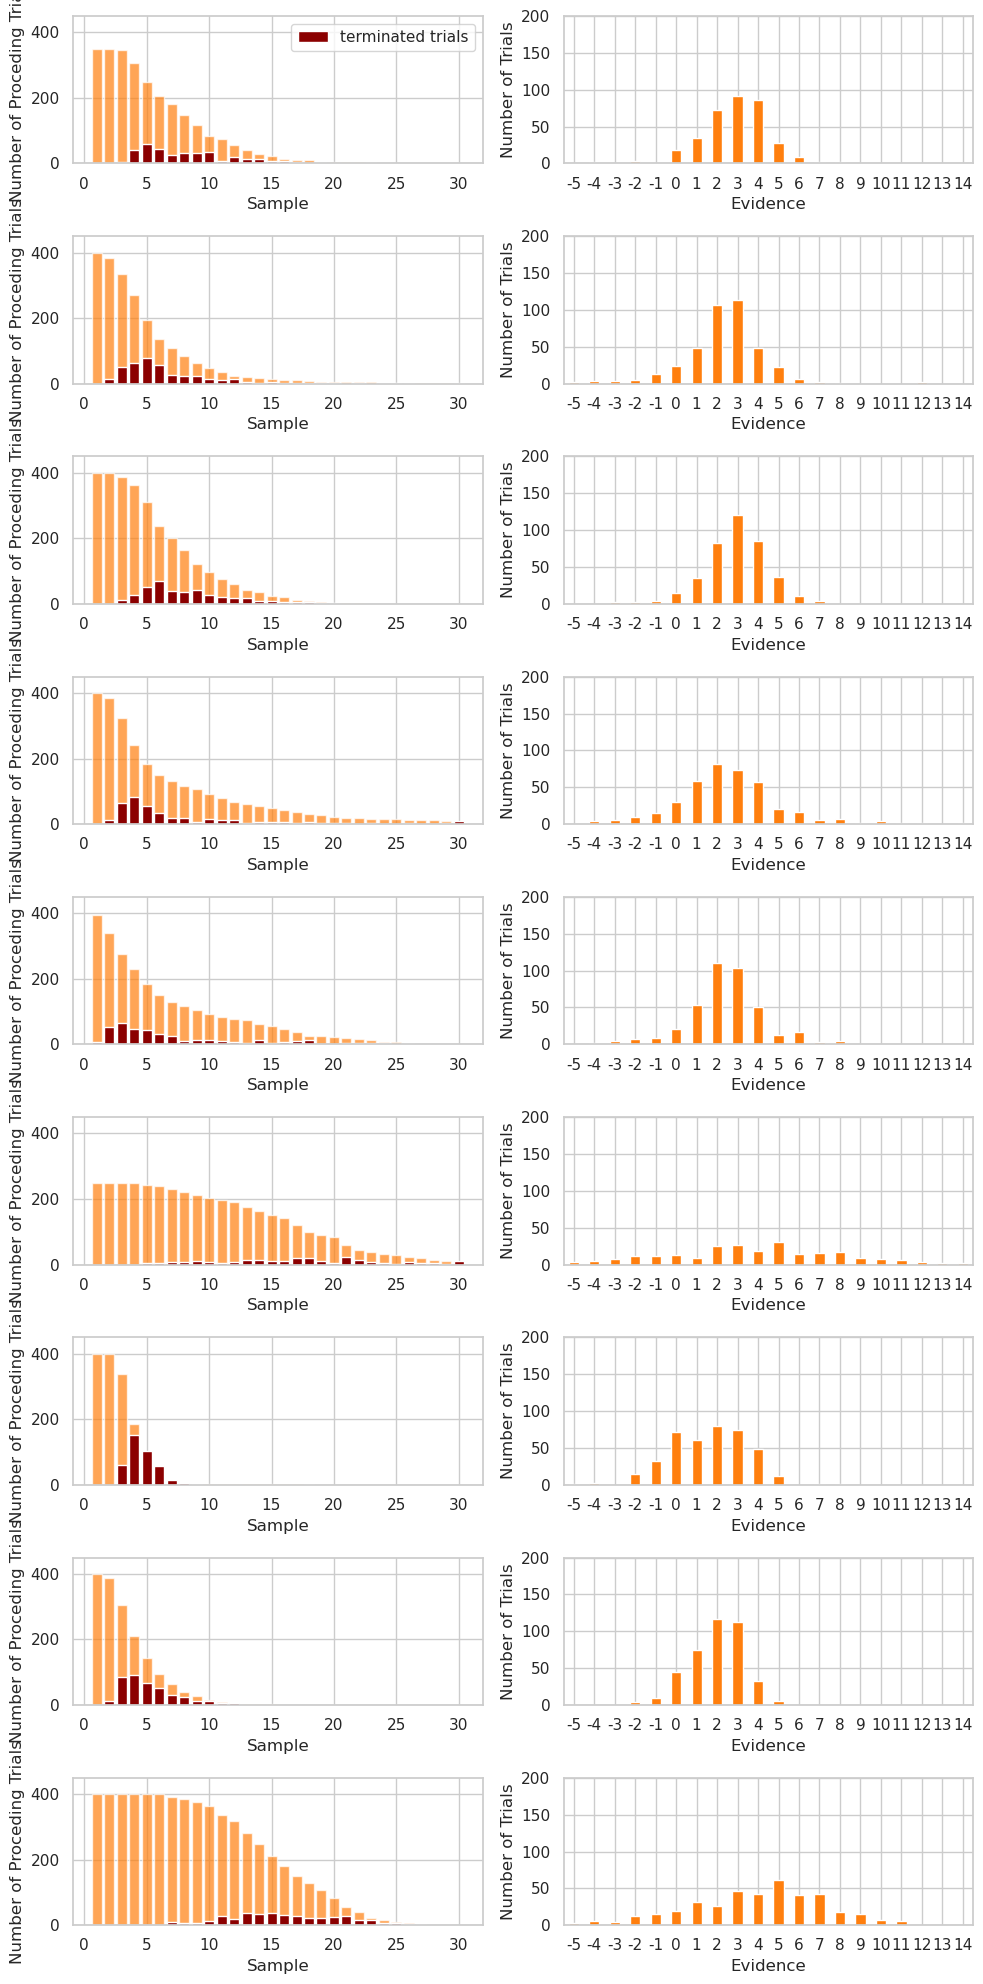

In [32]:
# creating grid for subplots
fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(10)


axs_sample =[]
axs_evidence =[]
for i, id in enumerate(ids):
    axs_sample.append(plt.subplot2grid(shape=(len(ids), 2), loc=(i, 0), colspan=1))
    axs_evidence.append(plt.subplot2grid(shape=(len(ids), 2), loc=(i, 1), colspan=1))


# accuracy by subject

for j, id in enumerate(ids):
    df_sub = df[df['sid']==id]

    counts_200 = {}
    # Count for count_corrected == 0
    for i in range(30):
        counts_200[f'>{i}'] = (df_sub[df_sub["stimDur"]==0.25]['count_corrected'] > i).sum()
    counts_df_200 = pd.DataFrame(list(counts_200.items()), columns=['Condition', 'Count'])

    value_counts_250 =df_sub[df_sub["stimDur"]==0.25]['count_corrected'].value_counts().sort_index()
    complete_counts_250 = value_counts_250.reindex(full_index,fill_value=0)

    axs_sample[j].bar(np.arange(1,31), counts_df_200['Count'], color = colors[1], alpha = 0.7)
    axs_sample[j].bar(np.arange(1,31),complete_counts_250, color = "darkred",label = "terminated trials")


    axs_sample[j].set_xlabel("Sample")
    axs_sample[j].set_ylabel("Number of Proceding Trials")



    evidence_counts_250 =df_sub[df_sub["stimDur"]==0.25]['signed_bound'].value_counts().sort_index()


    filtered_250 = evidence_counts_250[(evidence_counts_250.index >= -5) & (evidence_counts_250.index <= 15)]
    filtered_250.reindex(range(-5,15),fill_value=0).plot.bar(color=colors[1], ax=axs_evidence[j],rot=0)

for ax in axs_sample:
    ax.set_ylim(0,450)
axs_sample[0].legend()

for ax in axs_evidence:
    ax.set_ylim(0,200)
    # ax.set_xlim(-5,15)

    ax.set_xlabel("Evidence")
    ax.set_ylabel("Number of Trials")    



fig.tight_layout()

fig.savefig(f'{FIG_DIR}number_of_trials_by_sub_250.png', dpi=300)

In [33]:
df['rate'] = df['signed_bound']/df['count']

/tmp/ipykernel_1538791/1016423808.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rate'] = df['signed_bound']/df['count']


In [34]:
df250 = df[df['stimDur']==0.25]

In [35]:
def get_jitter(sample_size, dim=2, strength = 0.7, randomseed=2024):
    np.random.seed(randomseed)
    # jitter = np.random.uniform(-0.5,0.5, (sample_size, dim))
    jitter =strength* (np.random.rand(sample_size,dim)-0.5) 
    return jitter

def get_jitter_circle(sample_size, dim=1, strength = 0.3, randomseed=2024):
    np.random.seed(randomseed)
    r =strength* ( np.random.uniform(0 ,0.5, (sample_size,dim)) )
    theta = np.random.uniform(0,2*np.pi, (sample_size, dim))
    return (r*np.cos(theta), r*np.sin(theta))


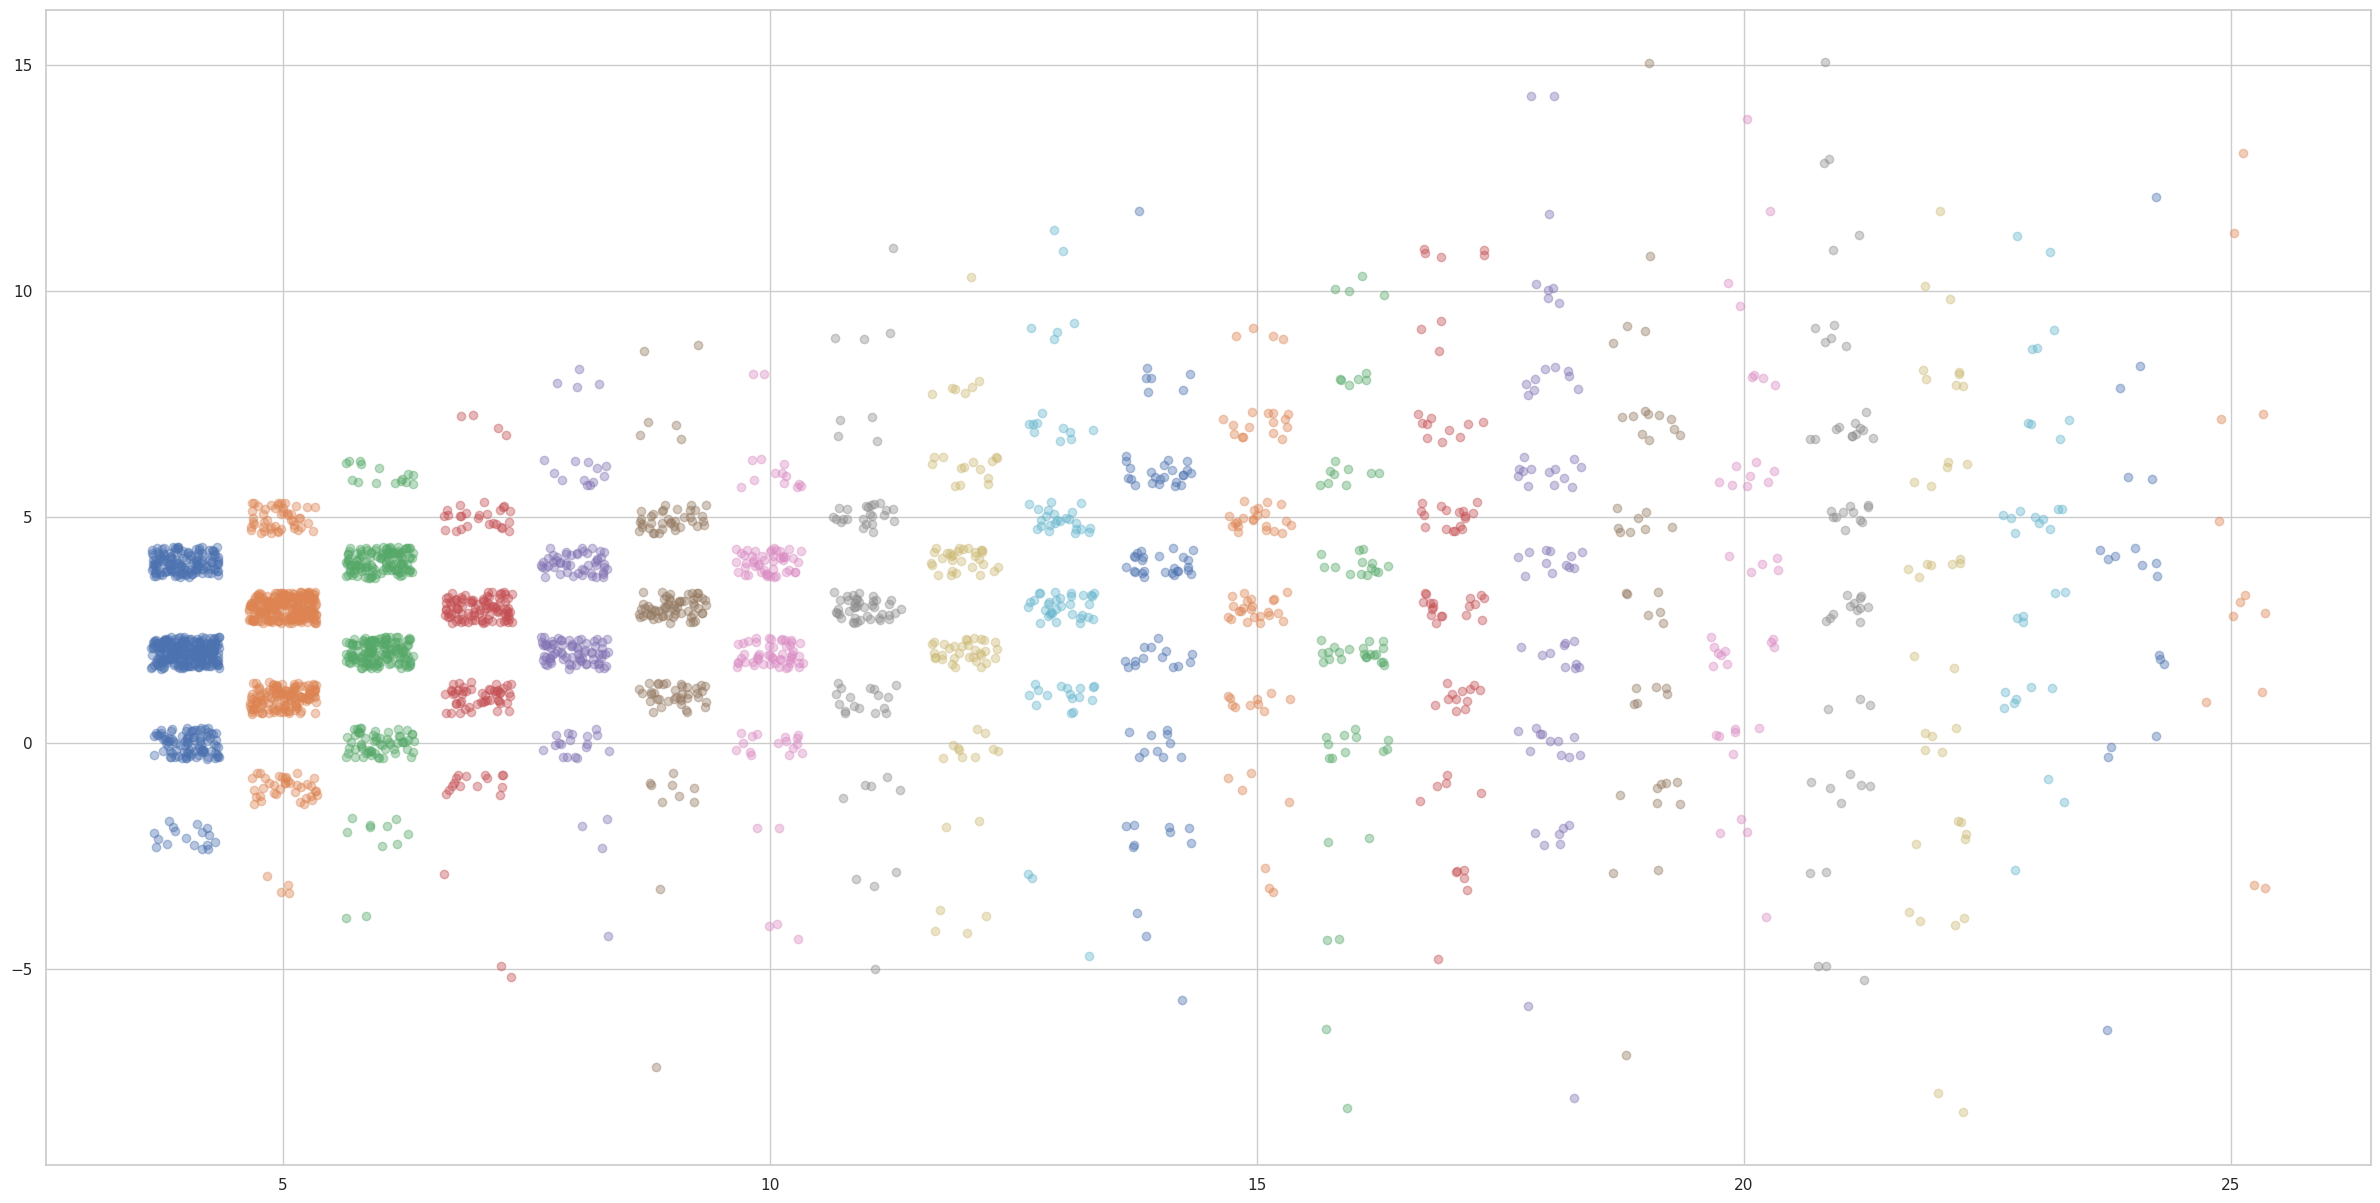

In [36]:
fig, ax = plt.subplots(figsize = (30,15))
for count in range(3,25):
    rate_ = df250[df250['count_corrected'] == count]['signed_bound']
    jitter = get_jitter(len(rate_), 2, randomseed=count)
    ax.scatter(x = np.array([count+1]*len(rate_))+jitter[:,0], y = np.array(rate_)+jitter[:,1],alpha=.40)

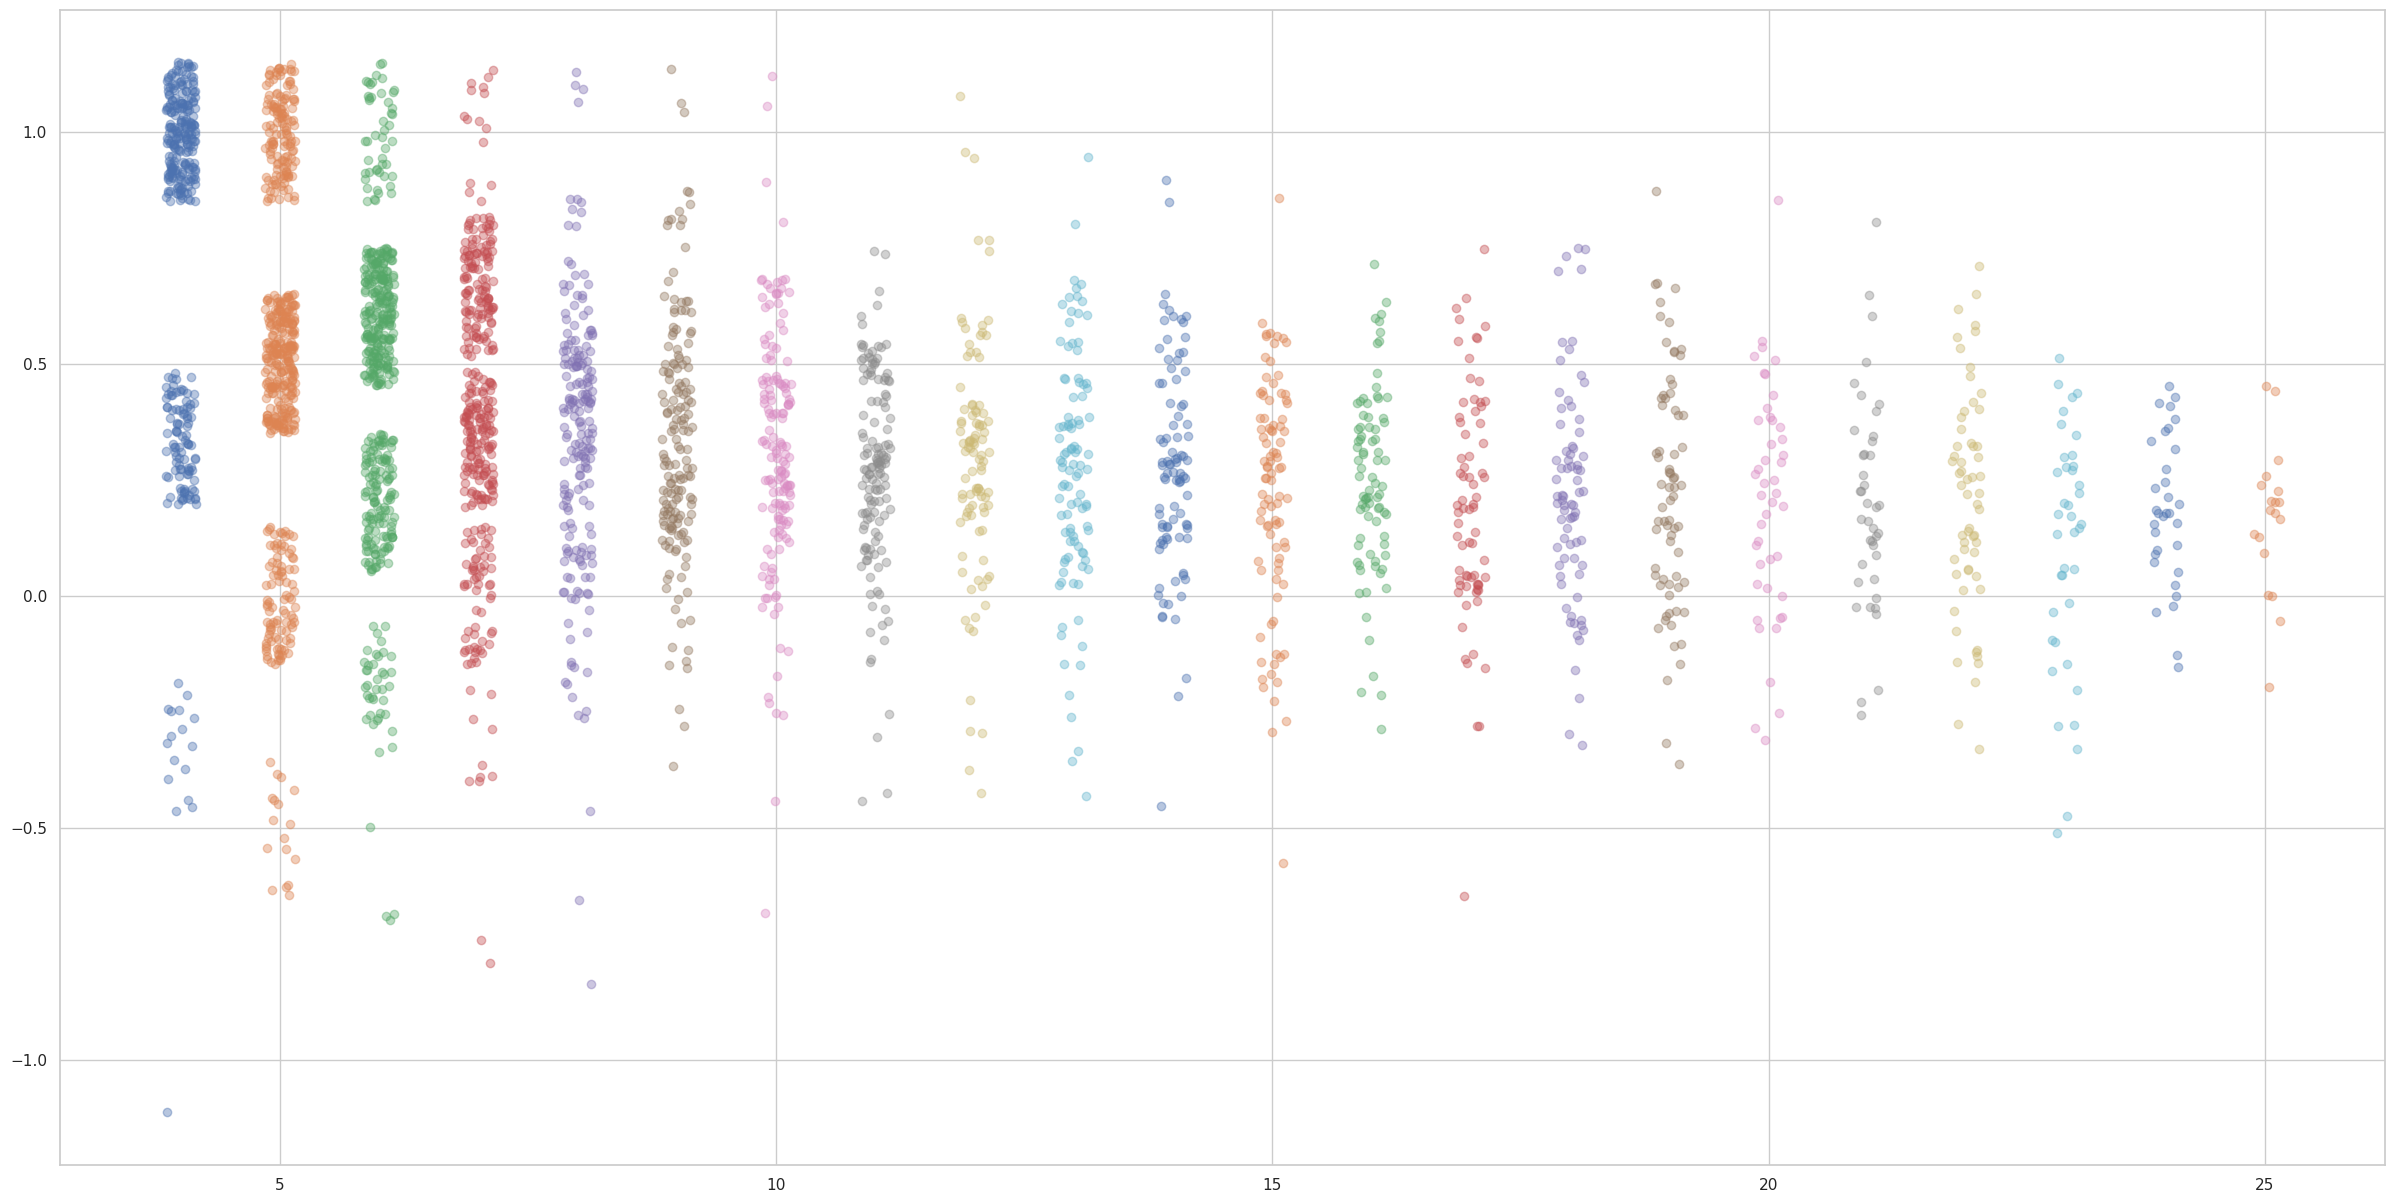

In [37]:
fig, ax = plt.subplots(figsize = (30,15))
for count in range(3,25):
    rate_ = df250[df250['count'] == count]['rate'] 
    jitter = get_jitter(len(rate_), 2, randomseed=count,strength=0.3)
    ax.scatter(x = np.array([count+1]*len(rate_))+jitter[:,0], y = np.array(rate_)+jitter[:,1],alpha=.40)

In [203]:
np.diff(expected_sn)

array([0.24, 0.24, 0.24, 0.24, 0.24, 0.24, 0.24, 0.24, 0.24, 0.24, 0.24,
       0.24, 0.24, 0.24, 0.24, 0.24])

In [38]:
p= 0.62
n = np.arange(1,30)
expected_sn = n * (2*p-1)
# plt.plot(expected_sn)

In [39]:
df250["expected"] = df250["count_corrected"]+1 * (2*0.62 -1)

/tmp/ipykernel_1538791/2017450572.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df250["expected"] = df250["count_corrected"]+1 * (2*0.62 -1)


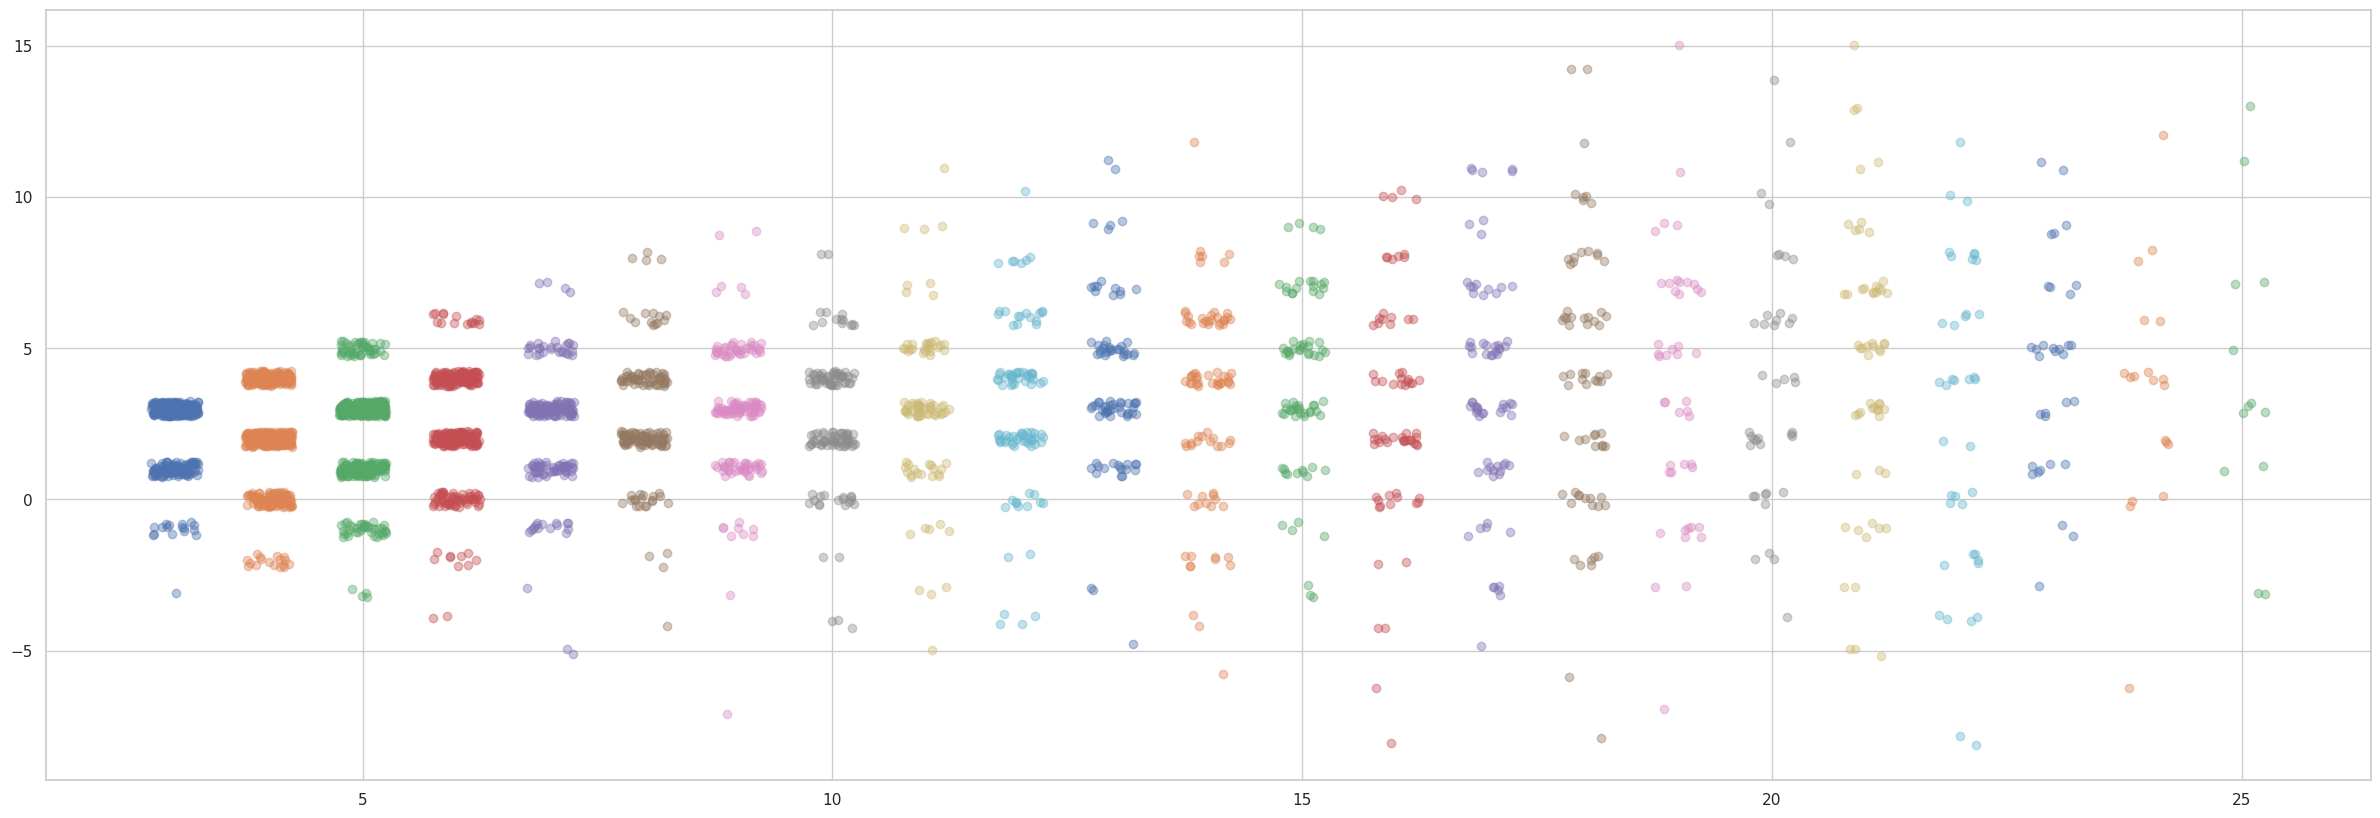

In [40]:
countfig, ax = plt.subplots(figsize = (30,10))
for count in range(2,25):
    expected_sn = (count+1) * (2*p-1) 
    rate_ = df250[df250['count_corrected'] == count]['signed_bound']
    jitter = get_jitter(len(rate_), 2, randomseed=count,strength=0.5)
    
    ax.scatter(x = np.array([count+1]*len(rate_))+jitter[:,0], y = np.array(rate_)+jitter[:,1],alpha=.40)

In [41]:
# position_range = np.arange(2,15)
# from matplotlib.ticker import MaxNLocator

# fig, ax = plt.subplots(1,len(position_range),figsize = (35,5))
# my_labels =['termination', 'continuation', 'optimal threshold']

# for i, p in enumerate(position_range):
#     bound = get_abs_evidence(dataset)[:,-1]
#     bound_stopped = bound[dataset_resp]
#     bound_cont = bound[~dataset_resp]
#     nbins = len(np.unique(bound_cont))

#     ax[i].hist(bound_stopped, density = True, orientation="horizontal",alpha=0.5, color = 'orange', label = my_labels[0], bins =nbins, )
#     ax[i].hist(bound_cont, density = True,orientation="horizontal", alpha=0.5, color = 'grey', label = my_labels[1],  bins =nbins)
#     ax[i].yaxis.set_major_locator(MaxNLocator(integer=True))
#     ax[i].axhline(GMEANS_train[i], color = 'purple', linewidth = 4, label = my_labels[2])
#     ax[i].set_ylim(0,16)
#     my_labels = ['__nolabels__']*3
#     ax[i].set_xlabel('density')
#     if i ==0:
#         ax[i].set_ylabel('Eividence')
#     ax[i].set_title(f"sample {p+1}")
# fig.legend(bbox_to_anchor=(0.9,0.2,0,1))
# fig.subplots_adjust(hspace=0.2)
# fig.savefig(f'{FIG_DIR}bound_dist_per_sample_{stimdur}.png', dpi=300,bbox_inches='tight')


(array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,
           1.,   3.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           1.,   1.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   2.,   2.,   0.,   0.,   0.,   2.,
           3.,   1.,   4.,   3.,   6.,   7.,   4.,   0.,   0.,   0.,   0.,
           0.,   0.

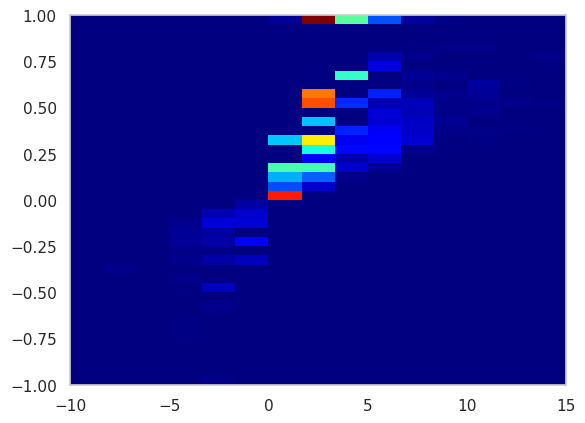

In [91]:
plt.hist2d(df250['signed_bound'], df250['rate'],bins=[15,40],cmap = "jet")

In [166]:
jitter = get_jitter(len(df250_acc['signed_bound']), 2, randomseed=count,strength=0.1)


<Axes: xlabel='signed_bound', ylabel='rate'>

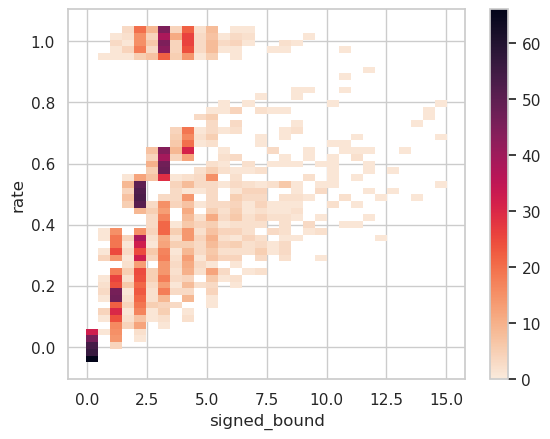

In [159]:
df250["expected"] = (df250["count_corrected"]+1) * (2*0.62 -1)
df250_acc = df250[df250['acc']==1]

/tmp/ipykernel_1538791/848149513.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df250["expected"] = (df250["count_corrected"]+1) * (2*0.62 -1)


<Axes: xlabel='signed_bound', ylabel='rate'>

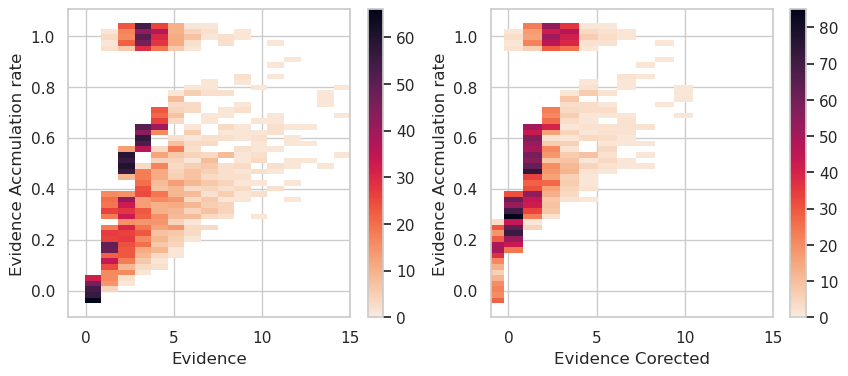

In [206]:
fig, ax = plt.subplots(1,2, figsize = (10,4))
jitter = get_jitter(len(df250_acc['signed_bound']), 2, randomseed=count,strength=0.1)

sns.histplot(x = df250_acc['signed_bound']+jitter[:,0], y= df250_acc['rate']+jitter[:,1], bins=[16,50], discrete=(False, False),
             cmap="rocket_r" ,cbar=True, ax =ax[0],stat="count")


sns.histplot(x = df250_acc['signed_bound']-df250_acc['expected']+jitter[:,1], y= df250_acc['rate']+jitter[:,1], bins=[16,50], discrete=(False, False),
             cmap="rocket_r" ,cbar=True, ax=ax[1],stat="count")
for ax_ in ax:
    ax_.set_xlim(-1,15)
    ax_.set_xlabel("Evidence")
ax[1].set_xlabel("Evidence Corected")
ax[0].set_ylabel("Evidence Accmulation rate")
ax[1].set_ylabel("Evidence Accmulation rate")

fig.savefig(f'{FIG_DIR}rate_by_bound.png', dpi=300,  bbox_inches='tight')

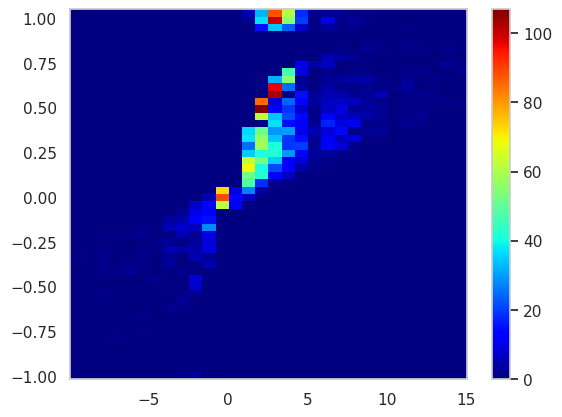

In [162]:
jitter = get_jitter(len(df250['signed_bound']), 2, randomseed=count,strength=0.1)
plt.hist2d(df250['signed_bound']+jitter[:,0], df250['rate']+jitter[:,1],bins=[30,50],cmap = "jet")
plt.colorbar()

In [71]:
jitter = get_jitter(len(df250['signed_bound']), 2, randomseed=count,strength=0.1)
plt.hist2d(df250['signed_bound']+jitter[:,0], df250['rate']+jitter[:,1],bins=[30,50],cmap = "jet")
plt.colorbar()

Error in callback <function _draw_all_if_interactive at 0x7f9339956ca0> (for post_execute):


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4,) + inhomogeneous part.

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4,) + inhomogeneous part.

<Figure size 3000x1000 with 1 Axes>

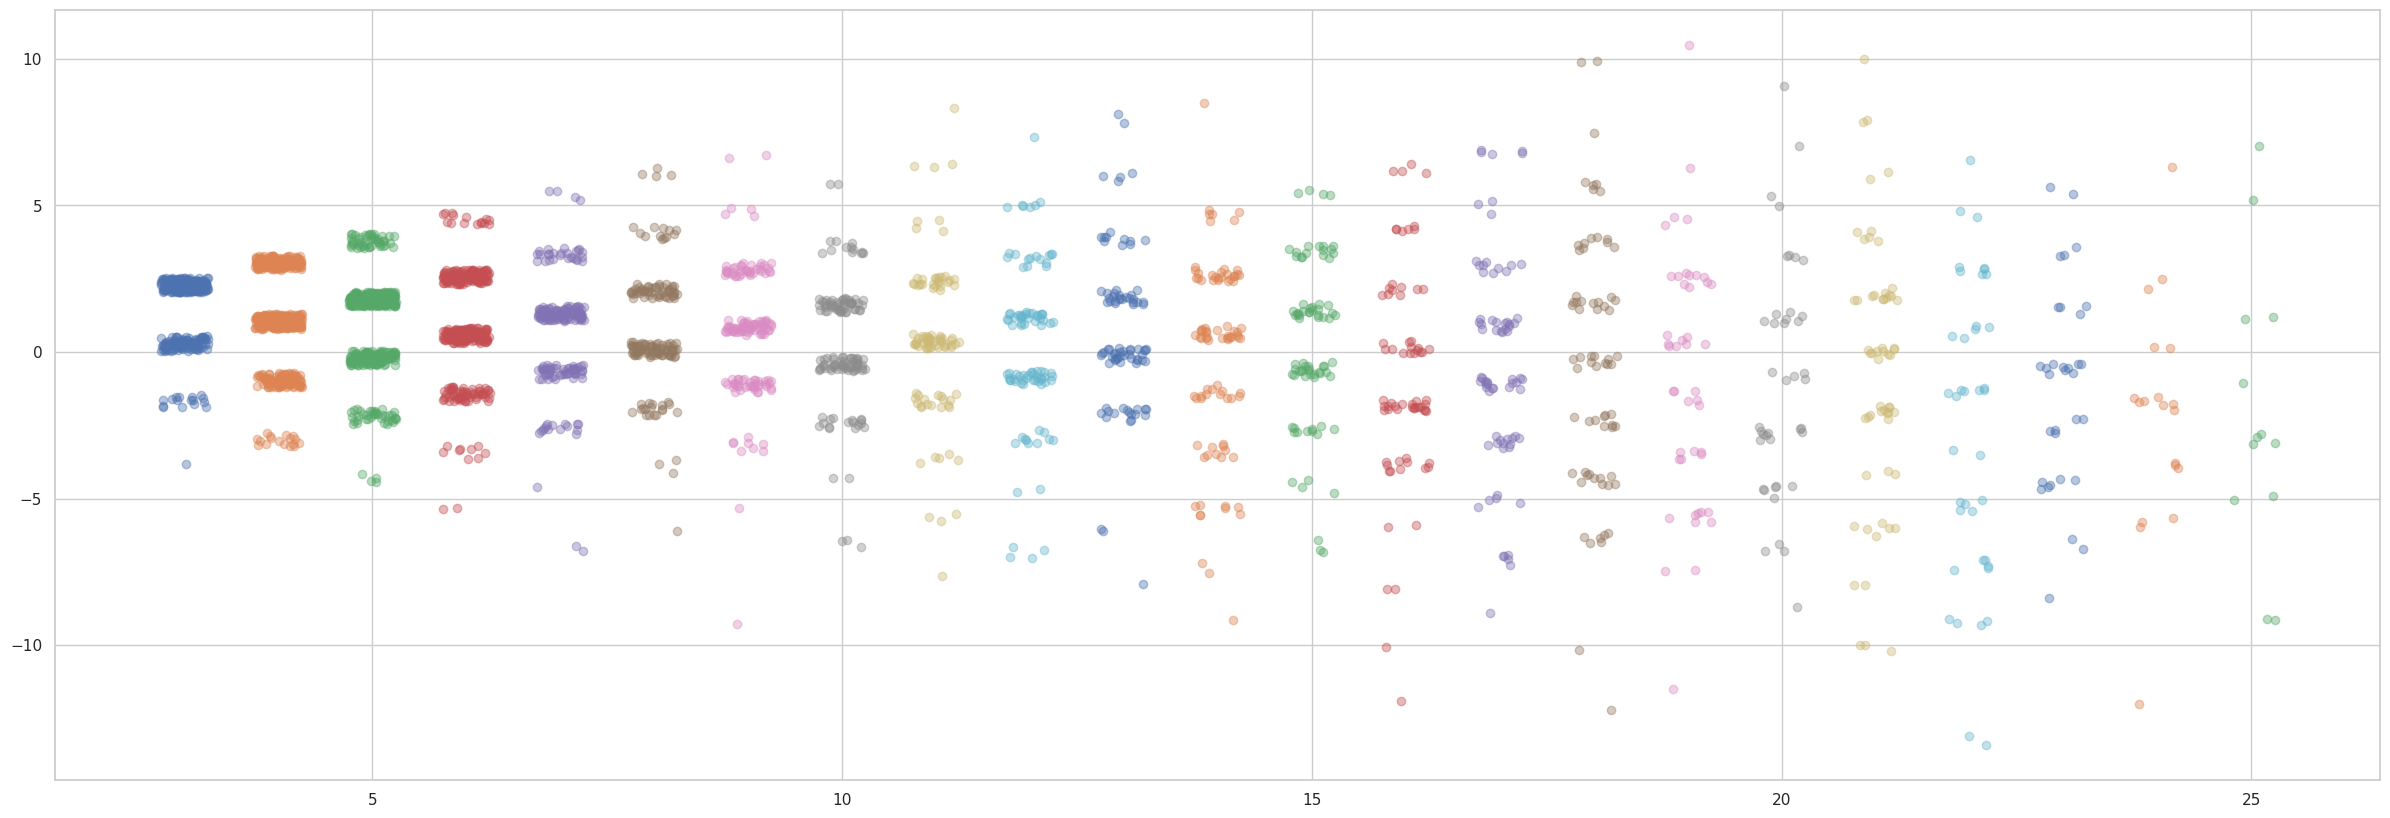

In [42]:
countfig, ax = plt.subplots(figsize = (30,10))
for count in range(2,25):
    expected_sn = (count+1) * (2*p-1) 
    rate_ = df250[df250['count_corrected'] == count]['signed_bound'] -expected_sn
    jitter = get_jitter(len(rate_), 2, randomseed=count,strength=0.5)
    
    ax.scatter(x = np.array([count+1]*len(rate_))+jitter[:,0], y = np.array(rate_)+jitter[:,1],alpha=.40)

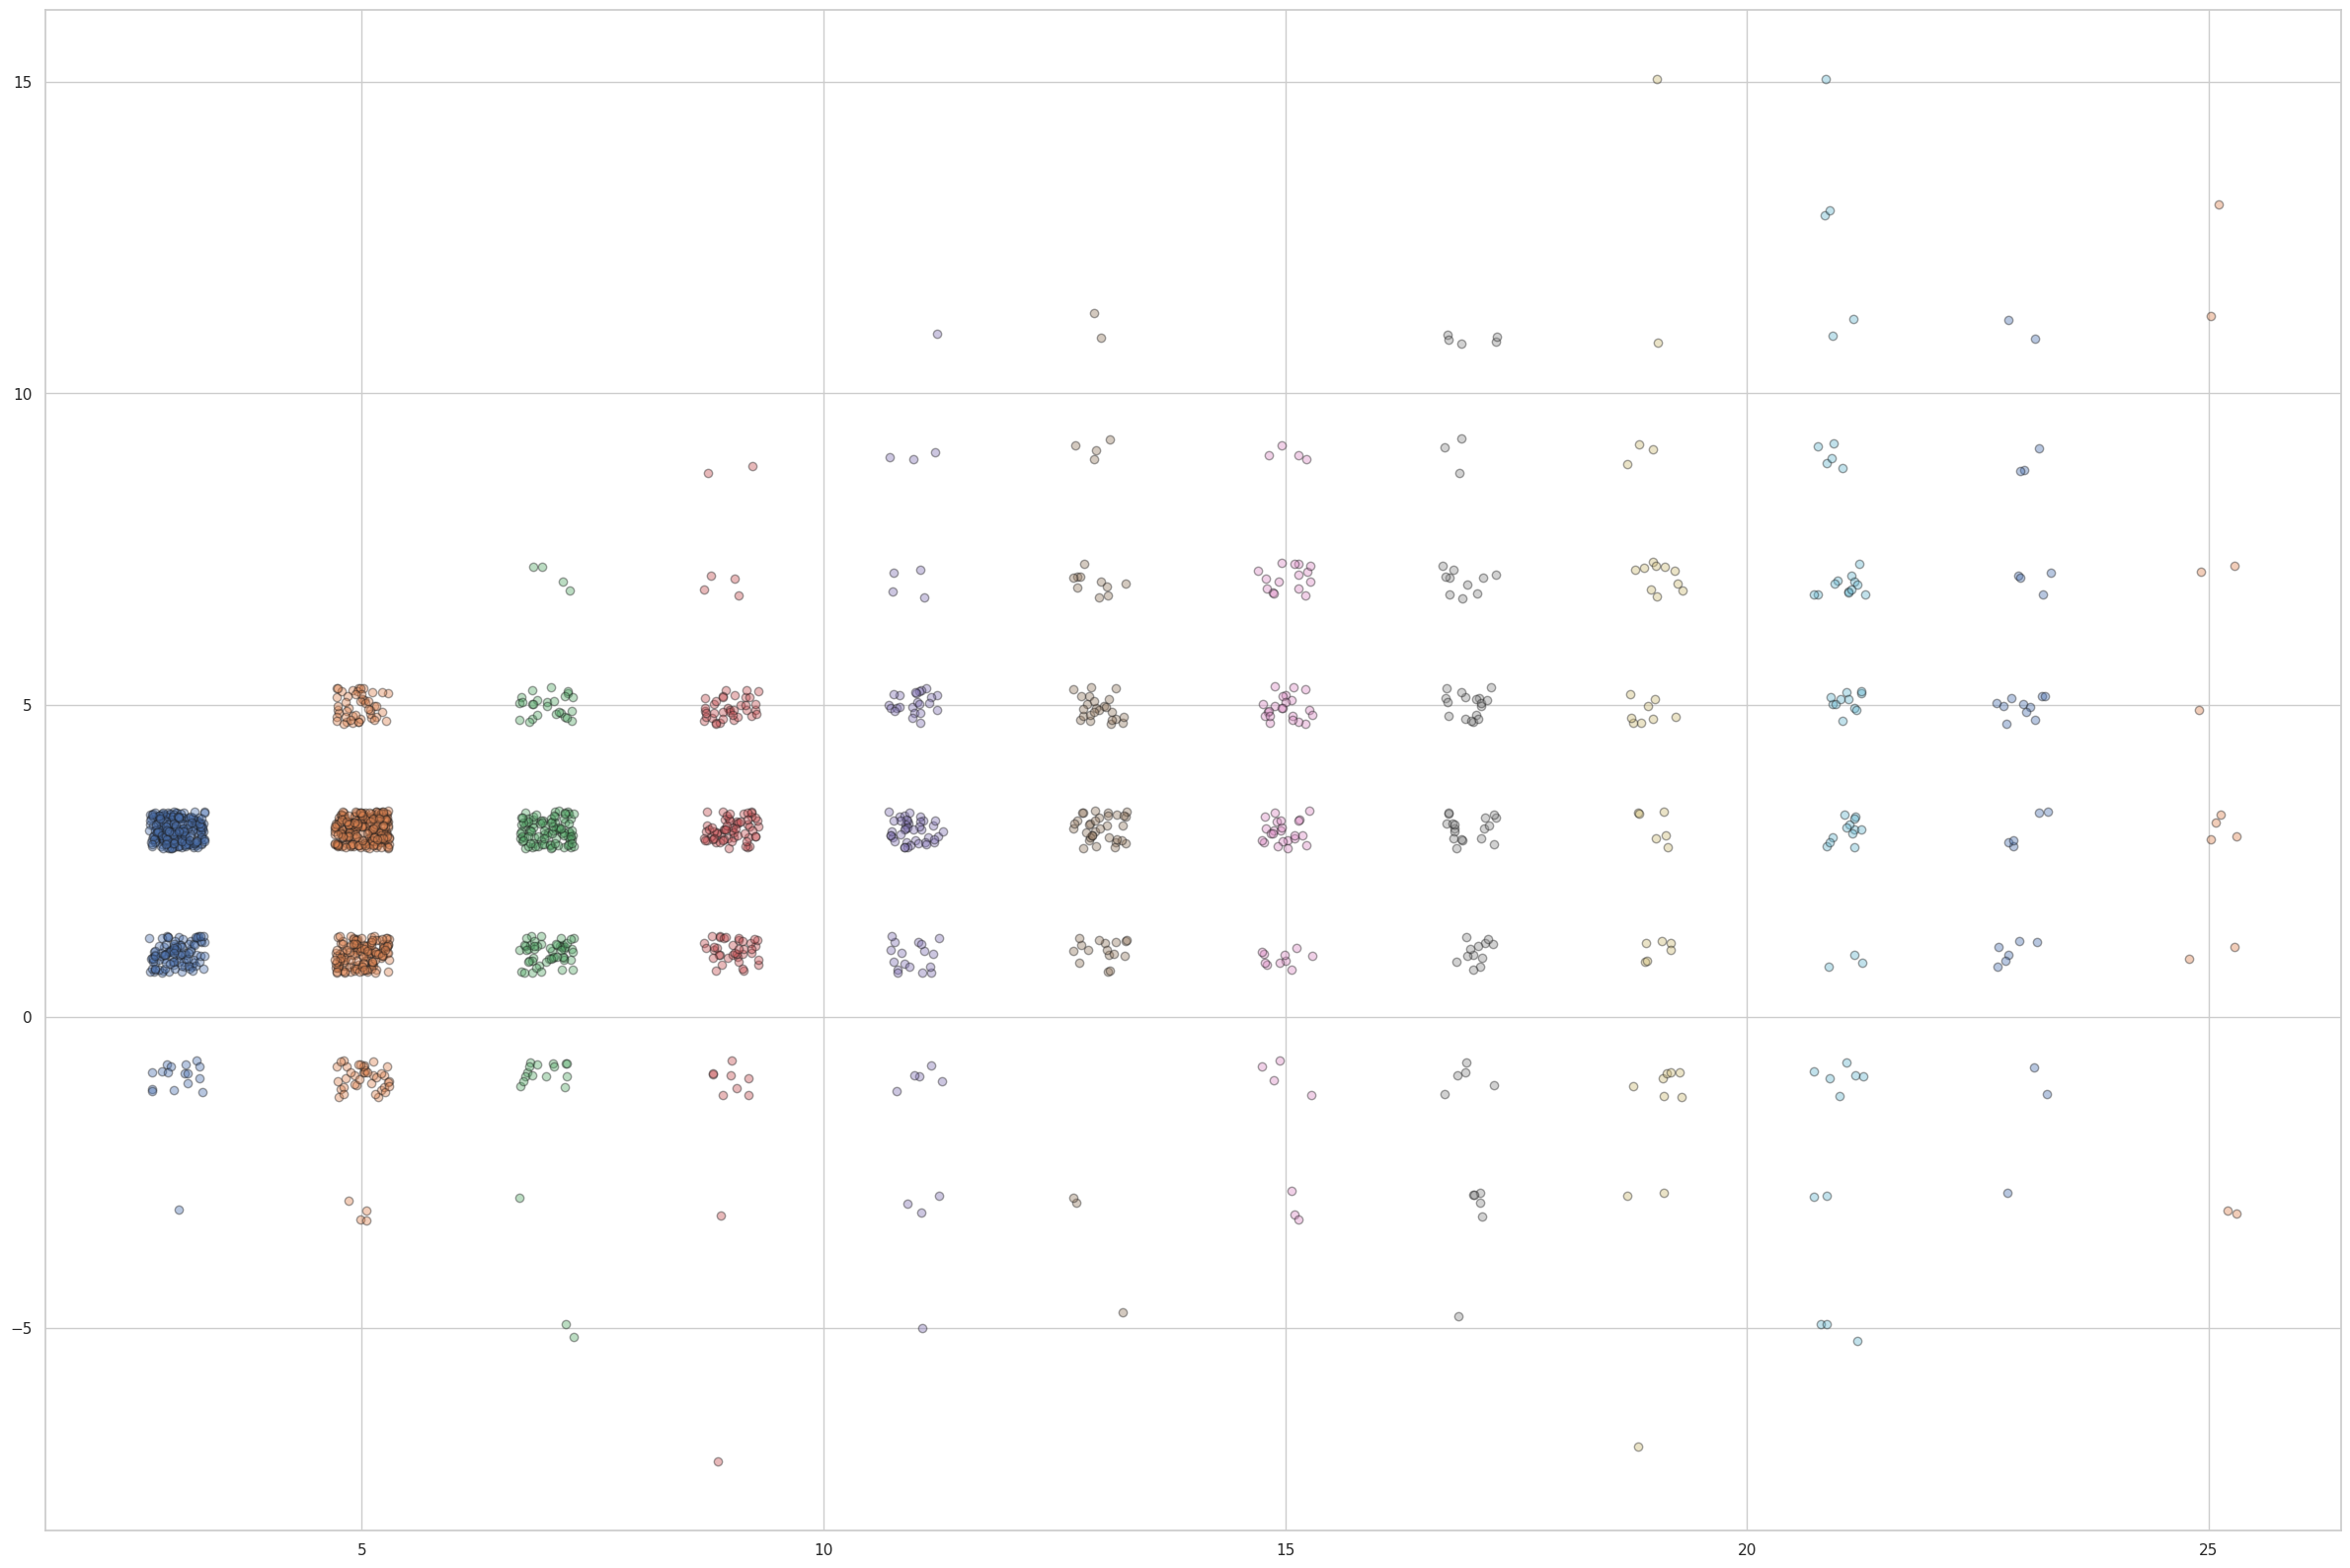

In [43]:
countfig, ax = plt.subplots(figsize = (30,20))
for count in range(2,25,2):
    expected_sn = (count+1) * (2*p-1) 
    rate_ = df250[df250['count_corrected'] == count]['signed_bound'] 
    jitter = get_jitter(len(rate_), 2, randomseed=count,strength=0.6)
    
    ax.scatter(x = np.array([count+1]*len(rate_))+jitter[:,0], y = np.array(rate_)+jitter[:,1],alpha=.40,
               edgecolor="k",  )

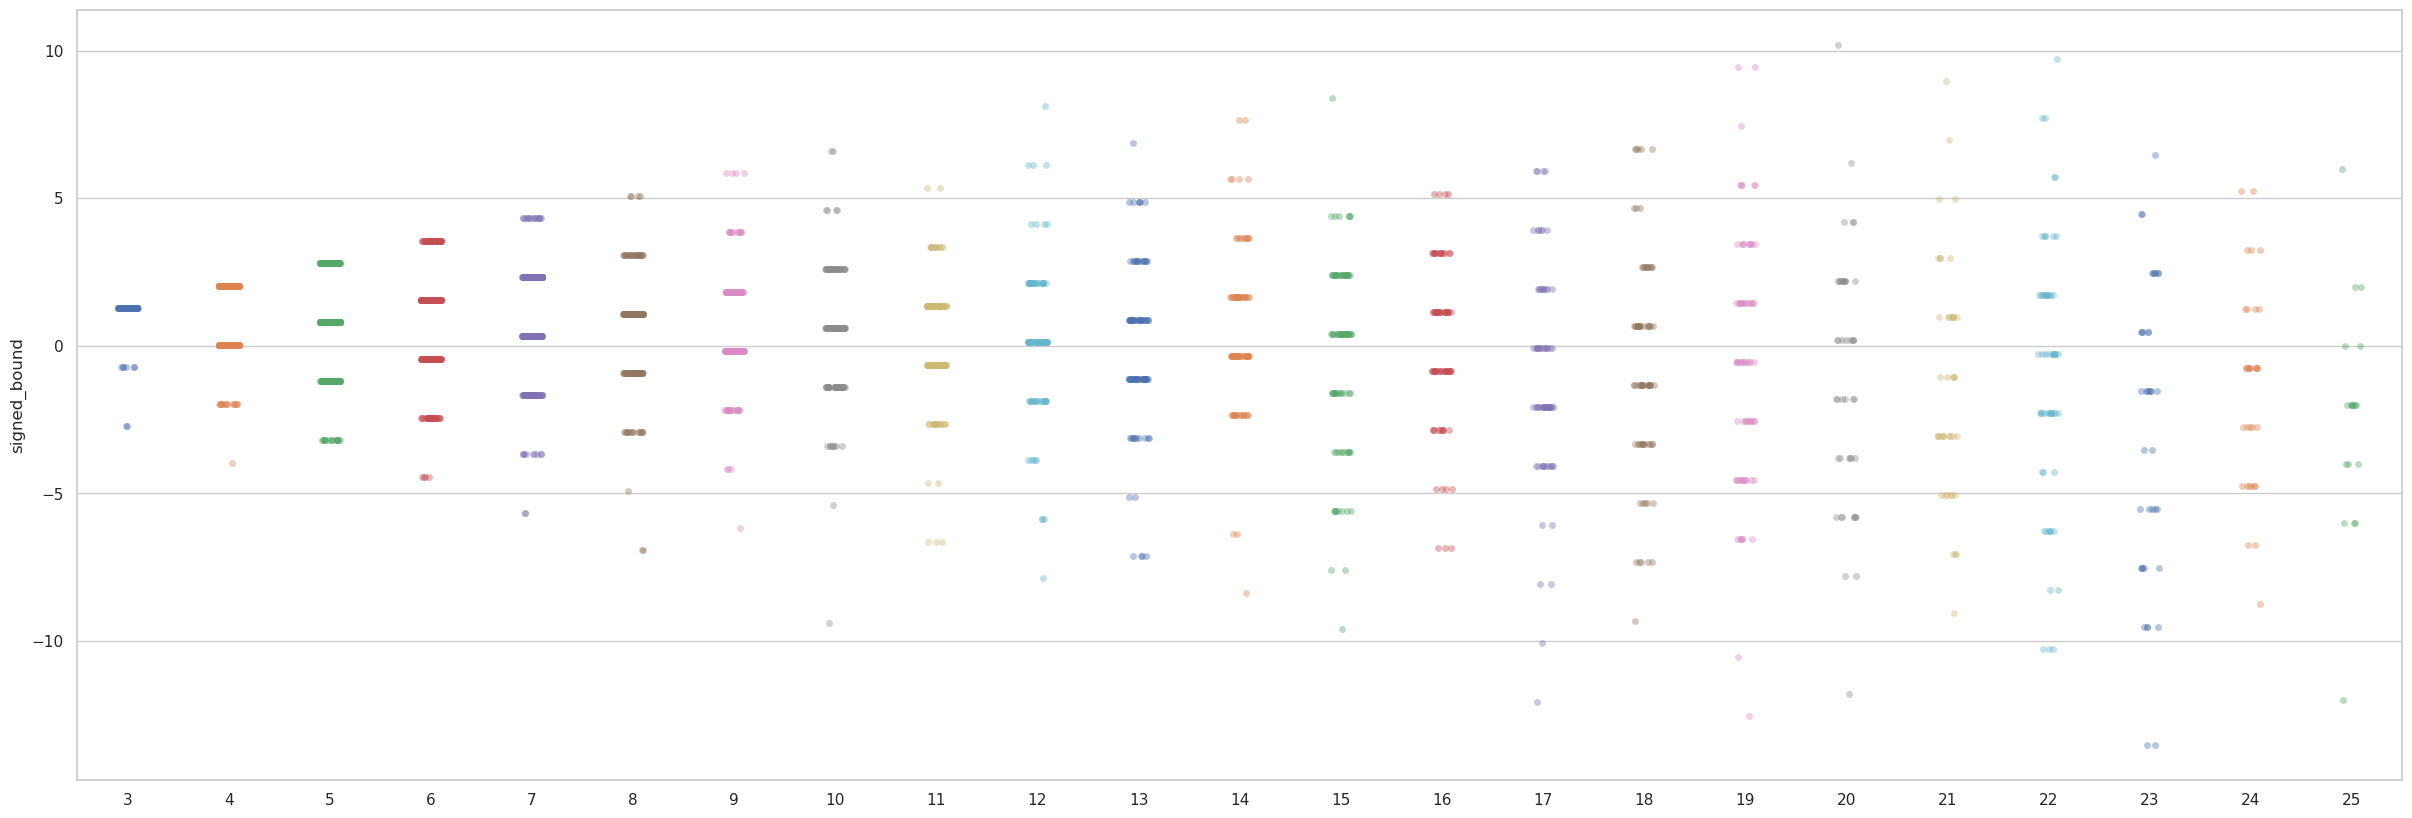

In [44]:
countfig, ax = plt.subplots(figsize = (30,10))
for count in range(2,25):
    expected_sn = (count+1) * (2*p-1) 
    rate_ = df250[df250['count'] == count]['signed_bound'] -  expected_sn
    

    sns.stripplot(x = [count+1]*len(rate_), y = rate_, jitter=True, alpha=.40)

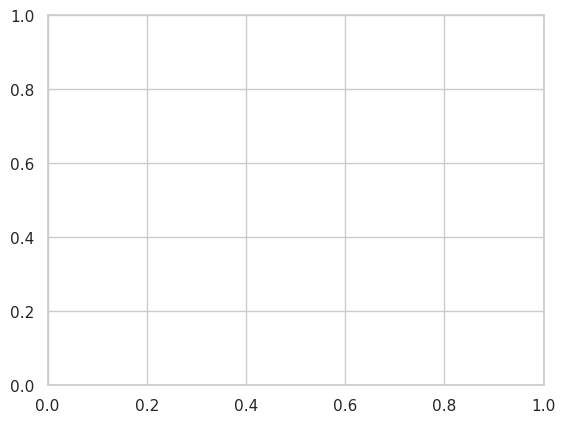

In [45]:
fig, ax = plt.subplots()

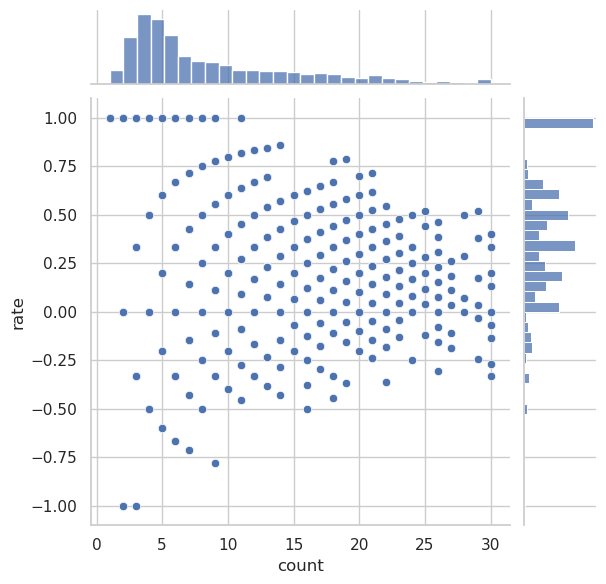

In [46]:
sns.jointplot(data=df250, x="count", y="rate")

In [47]:
df250["signed_bound"]

0      4.0
1      2.0
2      2.0
3      3.0
4      3.0
      ... 
945    1.0
946    5.0
947    5.0
948    6.0
949    5.0
Name: signed_bound, Length: 3400, dtype: float64

(array([  3.,   5.,  30., 101., 113., 807., 764., 842., 199., 536.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

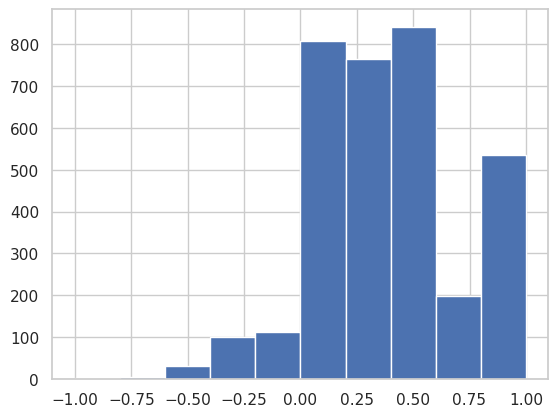

In [48]:
plt.hist(df250['rate'])

<Axes: xlabel='signed_bound', ylabel='rate'>

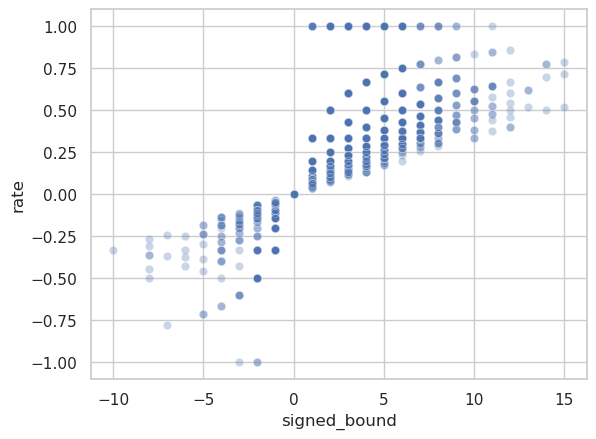

In [61]:
sns.scatterplot(x=df250["signed_bound"],y=df250['rate'],alpha=0.3, jitter)

In [ ]:
sns.load_dataset("glue").pivot(index="Model", columns="Task", values="Score")
sns.heatmap(glue)